# **FLAI - 11ª Competição de Machine Learning**

Protótipo com PyCaret - Identificação de melhores modelos de Machine Learning

Abril/2023 - by Marcos Kunyosi

## Bibliotecas

### Instalação de pacotes
*   PyCaret - AutoML </br>
*   Sweetviz (não será usado neste notebook)


In [2]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.9 MB/s eta 0:00:00


In [4]:
!pip install sweetviz 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 51.8 MB/s eta 0:00:00


### Importação das bibliotecas

In [5]:
import pandas as pd

import sweetviz as sv

import numpy as np

# métricas
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


## Importação dos dataset

In [6]:
# Importação dos dados de uma área pública 
#  Dessa forma fica mais fácil reiniciar os trabalhos, pois não é necessário 
#  carregar os arquivos de treino e teste no Colab

data_train_raw =  pd.read_csv('https://raw.githubusercontent.com/mkunyosi/FLAI/learning/DDS11/treino.csv')
data_test_raw =  pd.read_csv('https://raw.githubusercontent.com/mkunyosi/FLAI/learning/DDS11/teste.csv')


In [7]:
# Dados orginais ficarão em data_train_raw e data_test_raw.
# Dados a serem manipulados ficarão em df_data_train e df_data_test.
#  Em algumas situações é necessário recarregar os dados originais,
#  manter os dados em _raw facilita o "refresh" dos dados.
#  Neste notebook "refresh" não é utilizado, mas em outras
#  competições essa "técnica" foi bastante explorada 
#  (ver notebooks de outras competições no meu github)

# copy data tables for handling in next steps
df_data_train = data_train_raw.copy()
df_data_test = data_test_raw.copy()

In [8]:
# Pequena amostra dos dados
df_data_train.sample(5)

,Cliente,Empréstimo,ValorDoBem,Finalidade,Emprego,TempoEmprego,Negativos,Atrasos,TempoCliente,LC-Recente,LC-Atual,RDS
1754,bom pagador,59660.0,532107.54,Reforma,Autônomo,7.00,0.0,0.0,298.2,0.0,26.0,26.6%
2271,bom pagador,55578.0,283215.44,Reforma,Professional,11.75,0.0,1.0,179.3,0.0,14.0,30.6%
596,bom pagador,83524.0,246034.70,Diversas,Outros,23.50,NaN,0.0,280.1,0.0,31.0,38.5%
2849,bom pagador,81326.0,297401.96,Diversas,Geral,2.25,0.0,0.0,100.4,0.0,21.0,33.6%
2125,mau pagador,15700.0,107466.50,Reforma,Outros,4.75,0.0,0.0,77.0,3.0,9.0,NaN


In [9]:
# EDA - Análise Exploratória dos dados
# Não será feita aqui.
# É nessa etapa onde os dados deverão ser estudados de modo a 
#   ter insights para preparação (eng. de variáveis, normalização,
#    padronização etc.)

#eda = sv.analyze(source = df_data_train, target_feat = 'Cliente')
#eda.show_notebook()

---
## Machine Learning - PyCaret

Uso do PyCaret para projeção inicial das métricas gerados pelos modelos de ML.

In [10]:
# Importação de TODAS as funções relacionadas à classificação
# O ideal seria importar as funções de forma explícita que serão utilizadas no 
#   código, dessa forma ficaria evidente a origem a origem delas.
#   Contudo, para "simplificar" o código aqui, optei por importar tudo, 
#   usando o '*'

from pycaret.classification import * 

In [11]:
# O setup foi iniciado sem configurações adicionais. 
# Há apenas o parâmetro session_id para garantir que os resultados aqui obtidos
# sejam obtidos de forma idêntica em outras execuções.
#
# Há diversos outros parâmetros a serem explorados e que podem trazer melhorias
# de desempenho dos modelos.
#
# Note que apesar das variáveis serem fornecidas ao PyCaret sem qualquer ajuste,
# já é possível avaliar resultados de desempenho para o F1.
# 
# Na verdade, o PyCaret faz alguns tratamentos mínimos nas variáveis, deixando
# todos os dados aptos a serem usados pelos modelos de ML.
#
# Depois de entendido todo o código aqui, seria interessante trabalhar melhor
# a etapda de EDA e fazer ajustes nos dados de forma a ajudar o PyCaret
# a produzir modelos com desempenhos melhores.
# Primeiro, então, execute todo o código abaixo para entender o seu funcionamento,
# depois volte na etapa de EDA para montar um novo conjunto de dados de entrada
# e volte a executar o setup e demais fun;óes do PyCaret

pc_classification = setup(data = df_data_train, # dataset                 
                  session_id = 20230425,        # id de sessão 
                  target = 'Cliente')           # variável target

,Description,Value
0,Session id,20230425
1,Target,Cliente
2,Target type,Binary
3,Target mapping,"bom pagador: 0, mau pagador: 1"
4,Original data shape,"(3300, 12)"
5,Transformed data shape,"(3300, 17)"
6,Transformed train set shape,"(2310, 17)"
7,Transformed test set shape,"(990, 17)"
8,Ordinal features,1
9,Numeric features,8


In [25]:
# Ao executar o setup o PyCaret já processa os dados fornecidos e os deixam
# prontos para a fase de execução dos modelos de ML.
# Mas como será que ficaram os dados após essa fase?
# Para saber isso use o comando get_config para explorar os dados.
# Abaixo eu listei todos as variáveis possíveis para serem exploradas,
# aqui chamarei a atenção para 'dataset_transformed'
get_config('dataset_transformed')

# get_config()
# {'USI',
#  'X',
#  'X_test',
#  'X_test_transformed',
#  'X_train',
#  'X_train_transformed',
#  'X_transformed',
#  '_available_plots',
#  '_ml_usecase',
#  'data',
#  'dataset',
#  'dataset_transformed',
#  'exp_id',
#  'exp_name_log',
#  'fix_imbalance',
#  'fold_generator',
#  'fold_groups_param',
#  'fold_shuffle_param',
#  'gpu_n_jobs_param',
#  'gpu_param',
#  'html_param',
#  'idx',
#  'is_multiclass',
#  'log_plots_param',
#  'logging_param',
#  'memory',
#  'n_jobs_param',
#  'pipeline',
#  'seed',
#  'target_param',
#  'test',
#  'test_transformed',
#  'train',
#  'train_transformed',
#  'variable_and_property_keys',
#  'variables',
#  'y',
#  'y_test',
#  'y_test_transformed',
#  'y_train',
#  'y_train_transformed',
#  'y_transformed'}

,Empréstimo,ValorDoBem,Finalidade,Emprego_Professional,Emprego_Geral,Emprego_Outros,Emprego_Gerente,Emprego_Autônomo,Emprego_Comissionado,TempoEmprego,Negativos,Atrasos,TempoCliente,LC-Recente,LC-Atual,RDS,Cliente
702,49926.0,224575.937500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18.50,0.000000,0.000000,193.199997,0.0,22.0,0.000000,0
2994,58090.0,285127.687500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.75,0.000000,0.000000,163.300003,0.0,26.0,0.000000,0
2238,31714.0,260343.687500,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.50,0.000000,0.000000,101.800003,1.0,7.0,0.125000,0
54,62800.0,39994.179688,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.00,0.209832,0.409111,65.500000,0.0,17.0,0.333333,0
2625,30772.0,180126.093750,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.25,0.000000,1.000000,94.000000,0.0,19.0,0.076923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091,28260.0,212128.984375,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.000000,1.000000,121.000000,2.0,18.0,0.090909,0
2963,68452.0,388144.812500,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.75,0.000000,0.000000,219.899994,2.0,28.0,0.153846,0
1766,126542.0,230413.203125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.25,0.000000,0.000000,187.399994,1.0,18.0,0.000000,0
944,29516.0,560637.562500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.25,0.000000,0.000000,228.899994,0.0,19.0,0.250000,0


In [ ]:
# Observe os dados transformados.
# Quantas colunas há nos dados transformados?
# Por que há mais colunas do que o dataset inicial?
# Quais foram "dummifacadas" ?
# Alguma foi normalizada/padronizada?
# O que aconteceu com os dados faltantes?
#
# Lembre-se de que no setup, apesar de não passar muitos parâmetros, há algumas 
# configurações padrões, assim o PyCaret já faz um tratamento mínino nos dados.
# 

In [12]:
# Listagem dos modelos de ML disponíveis para avaliação
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [13]:
# quantidade de modelos disponíveis
models().shape[0]

18

In [44]:
# Comparação inicial dos modelos disponíveis, considerando a métrica F1, 
# Serão selecionando os 5 melhores modelos.

top5_models = compare_models(sort = 'F1', n_select = 5) 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9004,0.9447,0.6047,0.8136,0.6917,0.6341,0.6452,0.6930
xgboost,Extreme Gradient Boosting,0.8688,0.9156,0.7628,0.6234,0.6842,0.6028,0.6091,0.4460
rf,Random Forest Classifier,0.8693,0.9197,0.7279,0.6326,0.6743,0.5933,0.5976,0.6680
lightgbm,Light Gradient Boosting Machine,0.8667,0.9152,0.7395,0.6220,0.6733,0.5906,0.5959,0.3720
gbc,Gradient Boosting Classifier,0.8649,0.9080,0.7279,0.6185,0.6668,0.5830,0.5876,0.6550
ada,Ada Boost Classifier,0.8584,0.8956,0.7302,0.5995,0.6571,0.5691,0.5746,0.4950
lda,Linear Discriminant Analysis,0.8792,0.8930,0.5930,0.7187,0.6458,0.5741,0.5805,0.3970
dt,Decision Tree Classifier,0.8403,0.8086,0.7581,0.5550,0.6384,0.5395,0.5523,0.4080
ridge,Ridge Classifier,0.8818,0.0000,0.4767,0.8146,0.5970,0.5339,0.5625,0.3880
qda,Quadratic Discriminant Analysis,0.5307,0.5624,0.5744,0.2276,0.2964,0.0593,0.0818,0.4560


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [45]:
# No código abaixo os últimos resultado gerados pelo PyCarte serão salvos 
# na variável last_result, depois escolheremos alguns dados
# para serem salvos em all_data (nome do modelo, F1, precision e recall).
# A ideia é ter em all_data um histórico de todos os modelos
# gerados pelo PyCaret. Lá na frente usaremos isso para escolher o(s)
# modelo(s) para finalizar o trabalho

last_result = pull()
last_result

all_data = []
for i in range (5):
    all_data.append(['compare_models', 'top5_models', i, last_result.iloc[i]['Model'], last_result.iloc[i]['F1'], last_result.iloc[i]['Recall'], last_result.iloc[i]['Prec.']])

all_data

all_models = pd.DataFrame(all_data, columns=['Fase', 'Var', 'Idx', 'Modelo', 'F1', 'Recall', 'Precision'])
all_models.sort_values(by='F1', ascending=False)

,Fase,Var,Idx,Modelo,F1,Recall,Precision
0,compare_models,top5_models,0,Extra Trees Classifier,0.6917,0.6047,0.8136
1,compare_models,top5_models,1,Extreme Gradient Boosting,0.6842,0.7628,0.6234
2,compare_models,top5_models,2,Random Forest Classifier,0.6743,0.7279,0.6326
3,compare_models,top5_models,3,Light Gradient Boosting Machine,0.6733,0.7395,0.6220
4,compare_models,top5_models,4,Gradient Boosting Classifier,0.6668,0.7279,0.6185


In [46]:
# Tuning dos 5 melhores modelos
#
# Também já guardaremos os resultados em all_data
#
# A execução desta célula pode levar alguns minutos. 
# Enquanto o código roda, procure entender as linhas do código
#
top5_models_tuned = []

for i in range(len(top5_models)):
    top5_models_tuned.append(tune_model(top5_models[i], optimize = 'F1'))
    last_result = pull()
    all_data.append(['tune_model', 'top5_models_tuned', i, all_data[i][3], last_result.loc['Mean']['F1'], last_result.loc['Mean']['Recall'], last_result.loc['Mean']['Prec.']])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8658,0.8882,0.6512,0.6364,0.6437,0.5610,0.5611
1,0.8918,0.9307,0.7907,0.6800,0.7312,0.6639,0.6669
2,0.8788,0.9054,0.7442,0.6531,0.6957,0.6204,0.6224
3,0.8701,0.8559,0.7674,0.6226,0.6875,0.6067,0.6119
4,0.8571,0.9048,0.7674,0.5893,0.6667,0.5777,0.5859
5,0.9004,0.9393,0.7442,0.7273,0.7356,0.6743,0.6744
6,0.8571,0.9083,0.6744,0.6042,0.6374,0.5487,0.5500
7,0.8745,0.9278,0.8837,0.6129,0.7238,0.6460,0.6641
8,0.8571,0.8746,0.6977,0.6000,0.6452,0.5564,0.5588


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8788,0.9061,0.6977,0.6667,0.6818,0.6070,0.6072
1,0.9004,0.9562,0.8837,0.6786,0.7677,0.7057,0.7157
2,0.8788,0.9055,0.8140,0.6364,0.7143,0.6388,0.6466
3,0.8701,0.8855,0.7442,0.6275,0.6809,0.6001,0.6035
4,0.8701,0.9432,0.8605,0.6066,0.7115,0.6310,0.6470
5,0.8831,0.9447,0.7907,0.6538,0.7158,0.6430,0.6477
6,0.8701,0.9092,0.7442,0.6275,0.6809,0.6001,0.6035
7,0.8831,0.9541,0.9535,0.6212,0.7523,0.6802,0.7069
8,0.8485,0.9128,0.7674,0.5690,0.6535,0.5592,0.5695


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8528,0.8726,0.6279,0.6000,0.6136,0.5228,0.5230
1,0.8745,0.9243,0.7674,0.6346,0.6947,0.6166,0.6210
2,0.8571,0.8898,0.7674,0.5893,0.6667,0.5777,0.5859
3,0.8658,0.8581,0.7442,0.6154,0.6737,0.5902,0.5944
4,0.8398,0.9087,0.7442,0.5517,0.6337,0.5340,0.5438
5,0.8788,0.9104,0.6977,0.6667,0.6818,0.6070,0.6072
6,0.8701,0.8881,0.7442,0.6275,0.6809,0.6001,0.6035
7,0.8571,0.9151,0.9070,0.5735,0.7027,0.6149,0.6428
8,0.8485,0.8627,0.7442,0.5714,0.6465,0.5522,0.5600


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8701,0.8824,0.6279,0.6585,0.6429,0.5635,0.5638
1,0.8701,0.9064,0.7209,0.6327,0.6739,0.5933,0.5952
2,0.8701,0.8911,0.7209,0.6327,0.6739,0.5933,0.5952
3,0.8658,0.8469,0.6744,0.6304,0.6517,0.5687,0.5692
4,0.8528,0.9255,0.7674,0.5789,0.6600,0.5684,0.5776
5,0.9004,0.9317,0.7907,0.7083,0.7473,0.6855,0.6871
6,0.8571,0.8895,0.6744,0.6042,0.6374,0.5487,0.5500
7,0.8701,0.9342,0.8837,0.6032,0.7170,0.6366,0.6561
8,0.8485,0.8678,0.7209,0.5741,0.6392,0.5448,0.5505


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8831,0.8949,0.6977,0.6818,0.6897,0.6177,0.6177
1,0.8961,0.9327,0.8140,0.6863,0.7447,0.6801,0.6840
2,0.8745,0.9051,0.7442,0.6400,0.6882,0.6101,0.6129
3,0.8658,0.8615,0.7674,0.6111,0.6804,0.5969,0.6031
4,0.8615,0.9265,0.7674,0.6000,0.6735,0.5872,0.5944
5,0.8918,0.9226,0.7209,0.7045,0.7126,0.6460,0.6461
6,0.8658,0.9174,0.6977,0.6250,0.6593,0.5761,0.5774
7,0.8528,0.9462,0.9302,0.5634,0.7018,0.6117,0.6456
8,0.8528,0.8826,0.7442,0.5818,0.6531,0.5614,0.5683


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [47]:
# print dos dados armazenados até aqui ordenados por F1
all_data
all_models = pd.DataFrame(all_data, columns=['Fase', 'Var', 'Idx', 'Modelo', 'F1', 'Recall', 'Precision'])
all_models.sort_values(by='F1', ascending=False)

,Fase,Var,Idx,Modelo,F1,Recall,Precision
6,tune_model,top5_models_tuned,1,Extreme Gradient Boosting,0.7006,0.8047,0.6235
0,compare_models,top5_models,0,Extra Trees Classifier,0.6917,0.6047,0.8136
1,compare_models,top5_models,1,Extreme Gradient Boosting,0.6842,0.7628,0.6234
9,tune_model,top5_models_tuned,4,Gradient Boosting Classifier,0.6795,0.7558,0.6221
2,compare_models,top5_models,2,Random Forest Classifier,0.6743,0.7279,0.6326
3,compare_models,top5_models,3,Light Gradient Boosting Machine,0.6733,0.7395,0.6220
5,tune_model,top5_models_tuned,0,Extra Trees Classifier,0.6694,0.7279,0.6226
4,compare_models,top5_models,4,Gradient Boosting Classifier,0.6668,0.7279,0.6185
8,tune_model,top5_models_tuned,3,Light Gradient Boosting Machine,0.6663,0.7302,0.6167
7,tune_model,top5_models_tuned,2,Random Forest Classifier,0.6547,0.7349,0.5940


In [48]:
# Combinar modelos é uma boa prática, pois os modelos filhos podem
# gerar melhores resultados que os pais - evolução da espécie! ;-)
# 

# A combinação poderia ser qualquer, é claro, baseada em alguma estratégia.
# Aqui seguirei meu exemplo pegando os modelos que geraram os 5 melhores F1.

# Critério para fazer o ensemble é o "voting"
ensemble_best_top5 = blend_models(
                        [  top5_models_tuned[1]
                         , top5_models[0]
                         , top5_models[1]
                         , top5_models_tuned[4]
                         , top5_models[2]
                        ]
                        , optimize='F1')

# guardar os resultados
last_result = pull()
all_data.append(['blend_models', 'ensemble_best_top5', 0, 'Ensemble best-5', last_result.loc['Mean']['F1'], last_result.loc['Mean']['Recall'], last_result.loc['Mean']['Prec.']])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8831,0.9400,0.6512,0.7000,0.6747,0.6036,0.6042
1,0.9048,0.9581,0.7907,0.7234,0.7556,0.6966,0.6976
2,0.8788,0.9297,0.7442,0.6531,0.6957,0.6204,0.6224
3,0.8701,0.8911,0.7674,0.6226,0.6875,0.6067,0.6119
4,0.8615,0.9457,0.7442,0.6038,0.6667,0.5804,0.5855
5,0.8961,0.9534,0.7674,0.7021,0.7333,0.6690,0.6700
6,0.8658,0.9445,0.6977,0.6250,0.6593,0.5761,0.5774
7,0.8701,0.9594,0.9070,0.6000,0.7222,0.6420,0.6653
8,0.8528,0.9101,0.7442,0.5818,0.6531,0.5614,0.5683


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [49]:
# Uma outra escolha para criação do ensemble seria pegar
# diretamente os 5 melhores modelos tunados
ensemble_model_top5 = blend_models(top5_models_tuned, optimize='F1')

# guardar os resultados
last_result = pull()
all_data.append(['blend_models', 'ensemble_model_top5', 0, 'Ensemble best-tuned', last_result.loc['Mean']['F1'], last_result.loc['Mean']['Recall'], last_result.loc['Mean']['Prec.']])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8788,0.9390,0.6279,0.6923,0.6585,0.5851,0.5861
1,0.9004,0.9576,0.7907,0.7083,0.7473,0.6855,0.6871
2,0.8788,0.9309,0.7442,0.6531,0.6957,0.6204,0.6224
3,0.8701,0.8914,0.7674,0.6226,0.6875,0.6067,0.6119
4,0.8658,0.9445,0.7674,0.6111,0.6804,0.5969,0.6031
5,0.8961,0.9552,0.7674,0.7021,0.7333,0.6690,0.6700
6,0.8658,0.9435,0.6977,0.6250,0.6593,0.5761,0.5774
7,0.8788,0.9584,0.9535,0.6119,0.7455,0.6708,0.6992
8,0.8571,0.9101,0.7674,0.5893,0.6667,0.5777,0.5859


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [50]:
# print dos dados armazenados até aqui ordenados por F1
all_data
all_models = pd.DataFrame(all_data, columns=['Fase', 'Var', 'Idx', 'Modelo', 'F1', 'Recall', 'Precision'])
all_models.sort_values(by='F1', ascending=False)

,Fase,Var,Idx,Modelo,F1,Recall,Precision
6,tune_model,top5_models_tuned,1,Extreme Gradient Boosting,0.7006,0.8047,0.6235
0,compare_models,top5_models,0,Extra Trees Classifier,0.6917,0.6047,0.8136
11,blend_models,ensemble_model_top5,0,Ensemble best-tuned,0.6878,0.7558,0.6363
10,blend_models,ensemble_best_top5,0,Ensemble best-5,0.6867,0.7512,0.6367
1,compare_models,top5_models,1,Extreme Gradient Boosting,0.6842,0.7628,0.6234
9,tune_model,top5_models_tuned,4,Gradient Boosting Classifier,0.6795,0.7558,0.6221
2,compare_models,top5_models,2,Random Forest Classifier,0.6743,0.7279,0.6326
3,compare_models,top5_models,3,Light Gradient Boosting Machine,0.6733,0.7395,0.6220
5,tune_model,top5_models_tuned,0,Extra Trees Classifier,0.6694,0.7279,0.6226
4,compare_models,top5_models,4,Gradient Boosting Classifier,0.6668,0.7279,0.6185


In [ ]:
# A partir deste ponto devemos escolher um modelo para continuar os trabalhos.
#
# Pelo ranking gerado até aqui, os modelos de ML com melhores F1 foram:
# 'Extreme Gradient Boosting - tunado'- 0,7006
# 'Extra Trees Classifier'	- 0.6917	
# 'Ensemble best-tuned'	- 0.6878
#
# Como os primeiros do ranking são modelos que podem over overfitting
# (experiência de outras competições), vou preferir continuar com
# o modelo que usa combinação de outros modelos.
#
# Dessa forma, as análise seguintes usarão o modelo armazenado em 'ensemble_model_top5'

In [ ]:
# CUIDADO !!!! 
# NÃO EXECUTE ESTA CÉLULA - pelos menos agora
# O código abaixo demora muuuuiiitoooo para rodar (pode levar mais de uma 1h!)
#
# O código é aqui é encontrar o melhor nível para decidir o que é 1 e 0 na
# na variável resposta. Por padrão, em todas as análises anteriores, o
# PyCaret usou como "divisor de águas" o valor 0.5.

# ensemble_model_top5_opt = optimize_threshold(ensemble_model_top5, optimize='F1')

optimization loop finished successfully. Best threshold: 0.2578125 with F1=0.7166


In [55]:
# Na célula anterior a conclusão foi que o threshold=0.2578125 gera um F1=0.7166!
# Vamos, então gerar um novo ensemble considerando o threshold ótimo
ensemble_model_top5_opt = blend_models(top5_models_tuned, optimize='F1', probability_threshold=0.2578125)

# guardar os resultados
last_result = pull()
all_data.append(['blend_models', 'ensemble_model_top5_opt', 0, 'Ensemble best-tuned threshold ótimo', last_result.loc['Mean']['F1'], last_result.loc['Mean']['Recall'], last_result.loc['Mean']['Prec.']])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8961,0.9390,0.7907,0.6939,0.7391,0.6746,0.6769
1,0.9004,0.9576,0.8837,0.6786,0.7677,0.7057,0.7157
2,0.8788,0.9309,0.8605,0.6271,0.7255,0.6502,0.6635
3,0.8701,0.8914,0.7674,0.6226,0.6875,0.6067,0.6119
4,0.8615,0.9445,0.9070,0.5821,0.7091,0.6238,0.6502
5,0.8961,0.9552,0.8140,0.6863,0.7447,0.6801,0.6840
6,0.8788,0.9435,0.7907,0.6415,0.7083,0.6329,0.6384
7,0.8571,0.9584,0.9535,0.5694,0.7130,0.6258,0.6627
8,0.8528,0.9101,0.8140,0.5738,0.6731,0.5817,0.5966


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [56]:
# print dos dados armazenados até aqui ordenados por F1
all_data
all_models = pd.DataFrame(all_data, columns=['Fase', 'Var', 'Idx', 'Modelo', 'F1', 'Recall', 'Precision'])
all_models.sort_values(by='F1', ascending=False)

,Fase,Var,Idx,Modelo,F1,Recall,Precision
12,blend_models,ensemble_model_top5_opt,0,Ensemble best-tuned threshold ótimo,0.7166,0.8442,0.6263
6,tune_model,top5_models_tuned,1,Extreme Gradient Boosting,0.7006,0.8047,0.6235
0,compare_models,top5_models,0,Extra Trees Classifier,0.6917,0.6047,0.8136
11,blend_models,ensemble_model_top5,0,Ensemble best-tuned,0.6878,0.7558,0.6363
10,blend_models,ensemble_best_top5,0,Ensemble best-5,0.6867,0.7512,0.6367
1,compare_models,top5_models,1,Extreme Gradient Boosting,0.6842,0.7628,0.6234
9,tune_model,top5_models_tuned,4,Gradient Boosting Classifier,0.6795,0.7558,0.6221
2,compare_models,top5_models,2,Random Forest Classifier,0.6743,0.7279,0.6326
3,compare_models,top5_models,3,Light Gradient Boosting Machine,0.6733,0.7395,0.6220
5,tune_model,top5_models_tuned,0,Extra Trees Classifier,0.6694,0.7279,0.6226


In [ ]:
# note que o F1 otimizado está bem melhor!

In [53]:
# Partimos agora para o finalmentes

ensemble_model = ensemble_model_top5_opt
ensemble_model

CustomProbabilityThresholdClassifier(classifier=VotingClassifier(estimators=[('Extra '
                                                                              'Trees '
                                                                              'Classifier',
                                                                              ExtraTreesClassifier(bootstrap=False,
                                                                                                   ccp_alpha=0.0,
                                                                                                   class_weight=None,
                                                                                                   criterion='gini',
                                                                                                   max_depth=None,
                                                                                                   max_features='sqrt',
                                                                                                   max_leaf_nodes=None,
                                                                                                   max_samples=None,
                                                                                                   min_impurity_decrease=0.0,
                                                                                                   min_samples_leaf=1,
                                                                                                   min_samples_split=2,
                                                                                                   min_weight_fraction_le...
                                                                             max_leaf_nodes=None,
                                                                             min_impurity_decrease=0.01,
                                                                             min_samples_leaf=1,
                                                                             min_samples_split=4,
                                                                             min_weight_fraction_leaf=0.0,
                                                                             n_estimators=80,
                                                                             n_iter_no_change=None,
                                                                             random_state=20230425,
                                                                             subsample=0.5,
                                                                             tol=0.0001,
                                                                             validation_fraction=0.1,
                                                                             verbose=0,
                                                                             warm_start=False))],
                                     flatten_transform=True, n_jobs=-1,
                                     probability_threshold=0.2578125,
                                     verbose=False, voting='soft',
                                     weights=None)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

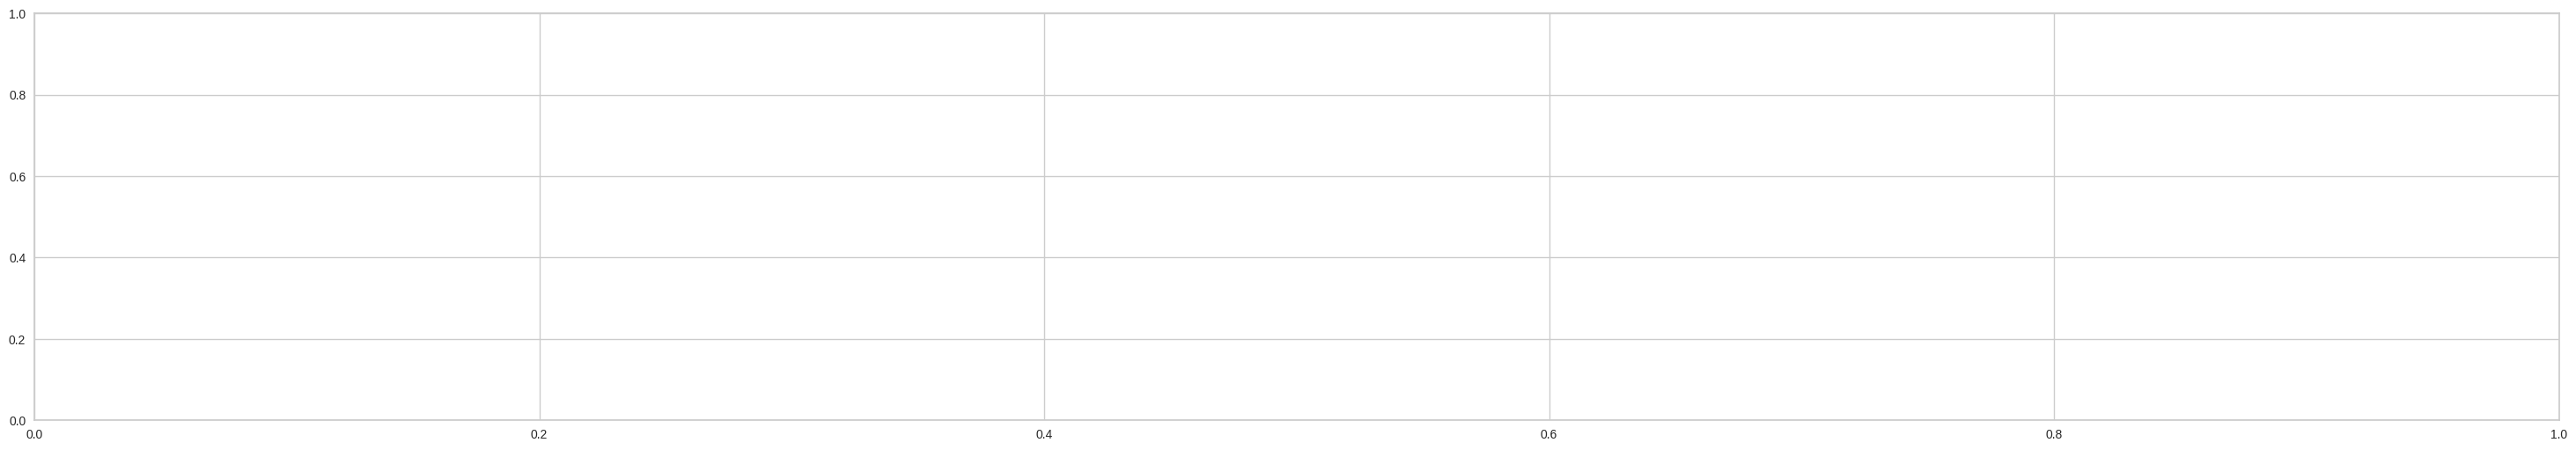

In [54]:
# Viasualização geral do modelo criado
# 
# Ao rodar o código abaixo, escolha, por exemplo 'Confusion Matrix' para avaliar
# como está a matriz de confusão.
#
# Em particular, aqui também tem uma forma de encontrar o threshold ótimo,
# porém aqui o processo é otimizado para rodar mais rápido, assim pode gerar
# um resultado diferente da função optimize_threshold (ver código anterior).
# Contudo, o resultado fica bastante próximo ótimo.

evaluate_model(ensemble_model)

In [57]:
# Reavaliação do modelo escolhido, porém com Threshold avaliado como ótimo
ensemble_model_top5_opt2 = blend_models(top5_models_tuned, probability_threshold=0.29)

# guardar os resultados
last_result = pull()
all_data.append(['blend_models', 'ensemble_model_top5_opt2', 0, 'Ensemble best-tuned threshold quase ótimo', last_result.loc['Mean']['F1'], last_result.loc['Mean']['Recall'], last_result.loc['Mean']['Prec.']])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8918,0.9390,0.7674,0.6875,0.7253,0.6581,0.6597
1,0.9004,0.9576,0.8837,0.6786,0.7677,0.7057,0.7157
2,0.8788,0.9309,0.8372,0.6316,0.7200,0.6446,0.6550
3,0.8701,0.8914,0.7674,0.6226,0.6875,0.6067,0.6119
4,0.8658,0.9445,0.9070,0.5909,0.7156,0.6328,0.6577
5,0.8918,0.9552,0.7907,0.6800,0.7312,0.6639,0.6669
6,0.8788,0.9435,0.7907,0.6415,0.7083,0.6329,0.6384
7,0.8615,0.9584,0.9535,0.5775,0.7193,0.6346,0.6697
8,0.8485,0.9101,0.7907,0.5667,0.6602,0.5661,0.5791


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [58]:
# print dos dados armazenados até aqui ordenados por F1
all_data
all_models = pd.DataFrame(all_data, columns=['Fase', 'Var', 'Idx', 'Modelo', 'F1', 'Recall', 'Precision'])
all_models.sort_values(by='F1', ascending=False)

,Fase,Var,Idx,Modelo,F1,Recall,Precision
12,blend_models,ensemble_model_top5_opt,0,Ensemble best-tuned threshold ótimo,0.7166,0.8442,0.6263
13,blend_models,ensemble_model_top5_opt2,0,Ensemble best-tuned threshold quase ótimo,0.7115,0.8302,0.6260
6,tune_model,top5_models_tuned,1,Extreme Gradient Boosting,0.7006,0.8047,0.6235
0,compare_models,top5_models,0,Extra Trees Classifier,0.6917,0.6047,0.8136
11,blend_models,ensemble_model_top5,0,Ensemble best-tuned,0.6878,0.7558,0.6363
10,blend_models,ensemble_best_top5,0,Ensemble best-5,0.6867,0.7512,0.6367
1,compare_models,top5_models,1,Extreme Gradient Boosting,0.6842,0.7628,0.6234
9,tune_model,top5_models_tuned,4,Gradient Boosting Classifier,0.6795,0.7558,0.6221
2,compare_models,top5_models,2,Random Forest Classifier,0.6743,0.7279,0.6326
3,compare_models,top5_models,3,Light Gradient Boosting Machine,0.6733,0.7395,0.6220


## Avaliações do modelo

In [59]:
# Até aqui o melhor modelo está em ensemble_model_top5_opt

ensemble_model = ensemble_model_top5_opt


In [62]:
# Avaliação do F1 para os dados de teste
# 
# Note que até aqui, todos os F1 avaliados foram com os dados de treinamento,
# valendo-se validação cruzada.
pred = predict_model(ensemble_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9465,0.9629,0,0,0,0.8166,0.8180


In [65]:
# Como há um "bug" no PyCaret, não é possível saber o F1 rodando o comando
# "predict_model(ensemble_model)", então vamos pegar os dados de teste
# rodar o modelo e calcular o F1

training_data_index = get_config(variable="X_test").index.array
training_data = df_data_train.iloc[training_data_index].copy()
training_data = training_data.reset_index(drop=True)
training_data
pred = predict_model(ensemble_model)

y_true = training_data.Cliente.map({'mau pagador': 1, 'bom pagador': 0}) .array
y_pred = pred.prediction_label.map({'mau pagador': 1, 'bom pagador': 0}) .array
print("       F1 =", f1_score(y_true, y_pred))
print("Precision =", precision_score(y_true, y_pred))
print("   Recall =", recall_score(y_true, y_pred))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9465,0.9629,0,0,0,0.8166,0.8180


       F1 = 0.8490028490028491
Precision = 0.8922155688622755
   Recall = 0.8097826086956522


In [64]:
# Utilizando dados de teste o F1 foi de 0,8490!
# Como no CV obtivemos um F1 de 0,7166, o resultado é "estranho", pois
# seria mais razoável obter um F1 menor.
# Talvez o modelo que construímos memorizou ou o PyCaret, de fato, não
# separou os dados de teste adequadamente para o treinamento.
#
# Contudo, sigamos...

In [66]:
# Vamos verificar o F1 na inteira
pred = predict_model(ensemble_model, data = df_data_train)

y_true = df_data_train.Cliente.map({'mau pagador': 1, 'bom pagador': 0}) .array
y_pred = pred.prediction_label.map({'mau pagador': 1, 'bom pagador': 0}) .array
print("       F1 =", f1_score(y_true, y_pred))
print("Precision =", precision_score(y_true, y_pred))
print("   Recall =", recall_score(y_true, y_pred))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9839,0.9939,0,0,0,0.9464,0.9465


       F1 = 0.9562345169281585
Precision = 0.9698492462311558
   Recall = 0.9429967426710097


In [67]:
# F1 de 0,9562!!!
# Humm... isso aqui tem cara de que o modelo "memorizou os dados", ou seja,
# temos um overfitting no modelo!
#
# Sigamos

## Salvar o modelo para uso futuro

In [68]:
# Finalização do modelo gerado
finalized_model = finalize_model(ensemble_model)

In [69]:
# Exportação do modelo gerado (aquivo pickle)
save_model(finalized_model, 'model-01');

Transformation Pipeline and Model Successfully Saved


---

## Uso de um modelo salvo previamente

In [70]:
# Carga do modelo gerado
model_ML = load_model('model-01')

Transformation Pipeline and Model Successfully Loaded


In [71]:
# Recuperado dos dados (lidos lá no início deste notebook)
df_test = data_test_raw.copy()


In [72]:
# Predição dos dados usando o modelo gerado previamente
preds_test_FromSavedModel = predict_model(model_ML, data = df_test)

In [74]:
preds_test_FromSavedModel.sample(5)

,Empréstimo,ValorDoBem,Finalidade,Emprego,TempoEmprego,Negativos,Atrasos,TempoCliente,LC-Recente,LC-Atual,RDS,prediction_label,prediction_score
678,31086.0,273600.750000,Reforma,Professional,20.25,0.0,0.0,246.500000,0.0,11.0,26.0%,bom pagador,0.9995
261,49298.0,226701.718750,Diversas,Outros,0.25,NaN,2.0,268.500000,1.0,10.0,37.5%,bom pagador,0.9502
1276,167048.0,812248.937500,Diversas,Professional,5.00,0.0,0.0,229.800003,2.0,33.0,38.9%,bom pagador,0.9709
1099,39250.0,99987.023438,Diversas,Geral,7.50,0.0,1.0,109.000000,0.0,16.0,19.3%,bom pagador,0.9775
181,40820.0,376800.000000,Diversas,Professional,0.85,0.0,0.0,134.899994,0.0,22.0,NaN,mau pagador,0.8642


In [75]:
# saving new prediction on 'cvs' file
preds_test_FromSavedModel_csv = preds_test_FromSavedModel.to_csv()
subm = pd.DataFrame()
subm['Cliente'] = preds_test_FromSavedModel['prediction_label']


In [76]:
subm

,Cliente
0,bom pagador
1,bom pagador
2,bom pagador
3,bom pagador
4,bom pagador
...,...
1695,bom pagador
1696,mau pagador
1697,bom pagador
1698,mau pagador


In [77]:
# exportação do dataframe para arquivo CSV com exportação para o computador
from google.colab import files

fname = 'submissao.csv'
subm.to_csv(fname, index = False)
files.download(fname)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Revisão ate aqui
# - Geramos um modelo cuja expectativa (dados de validação cruzada) era de F1=0.7166
# - Finalizamos o modelo treinando o ensemble com todos os dados do dataset
# - Salvamos o modelo em formato pickel, o qual poderia ser usado para previsções 
#   sem a necessidade de novo treinamento
# - Geramos a predição para os dados de teste
# - Exportamos os dados preditos no formato da XI competição
#
# O que precisa ser feito?
# - Pegar o arquivo gerado, fazer a submissão e aguardar o resultado.
# - Trabalhar nos dados para melhor o F1
# - Testar outras combinações de ensemble
# - Usar os protótipos gerados pelo PyCaret e melhorá-los com tunagem dos hiperparâmetros
# - ...


# Bons estudos!

---